## Reading CSV Files with Encodings

We've learned how to select, assign, and analyze data with pandas using pre-cleaned data. In reality, data is rarely in the format needed to perform analysis. Data scientists commonly spend [over half their time cleaning data](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/), so knowing how to clean "messy" data is an extremely important skill.

We'll learn the basics of data cleaning with pandas as we work with laptops.csv, a CSV file containing information about 1,300 laptop computers. The first five rows of the CSV file are shown below:

We can start by reading the data into pandas. Let's look at what happens when we use the pandas.read_csv() function with only the filename as an argument:

In [1]:
import pandas as pd

laptops = pd.read_csv('../Datasets/laptops.csv')

We get an error! Reading the traceback, we can see it references UTF-8, which is a type of encoding. 

Computers, at their lowest levels, can only understand binary (0 and 1) and encodings are systems for representing characters in binary.

This error is telling us that the encoding it used (utf-8) failed to convert the data into binary.

Thankfully, the pandas.read_csv() function has an encoding argument we can use to specify an encoding:

In [ ]:
df = pd.read_csv("filename.csv", encoding="encoding_type")

The top four most popular encodings, which we can use to set the encoding parameter of pandas.read_csv() above, are:

- utf-8 - Universal Coded Character Set Transformation Format—8-bit, a dominant character encoding for the web.
- latin1 - Also known as 'ISO-8859-1', a part of the ISO/IEC 8859 series.
- Windows-1252 - A character encoding of the Windows family, also known as 'cp1252' or sometimes ANSI.
- utf-16 - Similar to 'utf-8' but uses 16 bits to represent each character instead of 8.

Since the pandas.read_csv() function already tried to read in the laptops.csv file using the default encoding type (utf-8) and failed, we know the file's not encoded using that format!

Let's try another popular encoding type to see if that works.

In [3]:
laptops = pd.read_csv('../Datasets/laptops.csv', encoding='latin1')

In [5]:
laptops.head(2)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


In [4]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


## Cleaning Column Names

We can see that all columns are represented by the object dtype, indicating that they store string values, not numerical values. Also, one of the columns, Operating System Version, contains some null values.

The column labels also have a mix of upper and lowercase letters, as well as spaces and parentheses, which will make them harder to work with and read. One noticeable issue is that the " Storage" column name has a leading space in front of it. These quirks with column labels can sometimes be hard to spot, so removing extra whitespaces from all column names will avoid headaches in the long run.

We can access the column axis labels of a dataframe using the [DataFrame.columns attribute](https://pandas.pydata.org/pandas-docs/stable/basics.html#attributes-and-the-raw-ndarray-s). This returns an index object—a special type of NumPy ndarray—with the label (name) of each column:

In [6]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

Not only can we use the attribute to view the column labels, we can also assign new ones with it:

In [8]:
laptops_test = laptops.copy()
laptops_test.columns = ['A', 'B', 'C', 'D', 'E',
                        'F', 'G', 'H', 'I', 'J',
                        'K', 'L', 'M']
print(laptops_test.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object')


Next, let's use the DataFrame.columns attribute to remove whitespaces from the column names.

In [9]:
laptops.columns = [col.strip() for col in laptops.columns]

In [11]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7   Storage                   1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


This is good start, but we still need to standardize the column labels a bit more. Let's finish cleaning them up by:

- Replacing spaces between words with underscores.
- Removing any special characters, like parentheses.
- Making all labels lowercase.
- Shortening any long column names.

Since we need to perform these steps on each of our column labels, it makes sense for us to create a helper function that uses [Python string methods](https://docs.python.org/3/library/stdtypes.html#string-methods) to clean our column labels as described above. Then we can use a for loop to apply that function to each column label. Let's look at an example:

In [19]:
def clean_col(col):
    col = col.replace('(', '').replace(')', '').lower().strip()
    col = col.replace('operating system', 'os').replace(' ', '_')
    return col

new_columns = [clean_col(c) for c in laptops.columns]

In [20]:
new_columns

['manufacturer',
 'model_name',
 'category',
 'screen_size',
 'screen',
 'cpu',
 'ram',
 'storage',
 'gpu',
 'os',
 'os_version',
 'weight',
 'price_euros']

In [21]:
laptops.columns = new_columns

In [22]:
laptops.head(2)

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


## Converting String Columns to Numeric

We observed earlier that all 13 columns have the object dtype, indicating they're storing strings. Let's look at the first few rows of some of our columns:

In [23]:
print(laptops.iloc[:5, 2:5])

    category screen_size                              screen
0  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600
1  Ultrabook       13.3"                            1440x900
2   Notebook       15.6"                   Full HD 1920x1080
3  Ultrabook       15.4"  IPS Panel Retina Display 2880x1800
4  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600


Of these three columns, we have three different types of text data:

- category: Purely text data; it has no numeric values.
- screen_size: Numeric data stored as text data because of the " character that represents "inches."
- screen: A combination of text data (screen type) and numeric data (screen size).

Because the values in the screen_size column are stored as text data, we can't easily sort them numerically. For instance, if we wanted to select laptops with screens 15" or larger, we'd be unable to do so without using some clever tricks.

Let's address this problem by converting the screen_size column to purely numeric values. Whenever we convert text to numeric data, we can follow this data cleaning workflow:

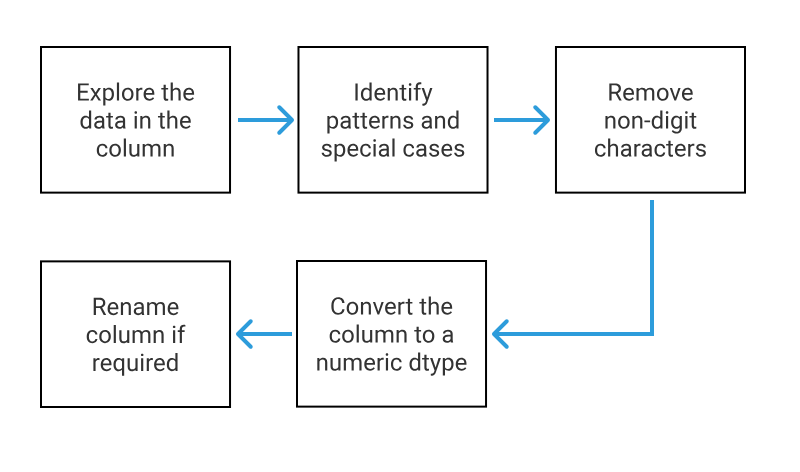

The first step is to explore the data. One of the best ways to start exploring the data is to use the Series.unique() method to view all of the unique values in the column:

In [24]:
laptops['screen_size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

Our next step is to identify patterns and special cases that block us from converting the column to numeric. Looking at the results above, we can observe the following:

- All values in this column follow a pattern: two digits, followed by a decimal (.), followed by a single digit, followed by a double quotation mark ("). We'll eventually need to remove that " so we can convert the column to numeric.
- There are no special cases; every unique value in the column matches this pattern.
- Because the int dtype won't be able to store these decimal values, we'll eventually need to convert the column to a float dtype.

Let's see if we can identify any patterns and special cases in the ram column next.

In [25]:
laptops['ram'].uniqueque()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

A note about Series.unique(): The Series.unique() method returns a numpy array, not a list or pandas series. This means that we can't use the Series methods we've learned so far, like Series.head(). If you want to convert the result to a list, you can use the tolist() method of the numpy array:

In [26]:
unique_ram = laptops["ram"].unique().tolist()

In [27]:
unique_ram

['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB']

## Removing Non-Digit Characters

We identified a clear pattern in the ram column; all values were integers, followed by the characters GB (gigabyte) at the end of the string:

To be able to convert both the ram and screen_size columns to numeric dtypes, we'll have to first remove the non-digit characters, GB and ", respectively.

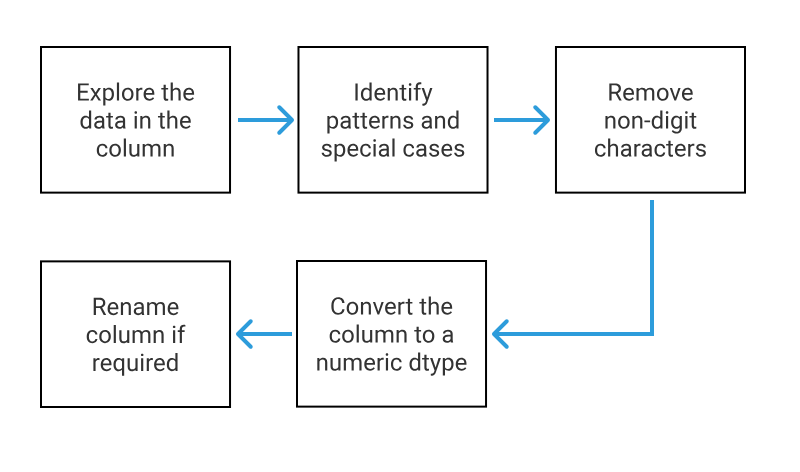

Thankfully, the pandas library contains dozens of [vectorized string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary) we can use to manipulate text data. Many of them perform the same operations as the Python string methods we've used already. Most pandas vectorized string methods are available using the [Series.str accessor](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling). This means we can access them by adding str between the series object name and the method name:

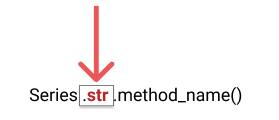

In our case, we can use the Series.str.replace() method, which is a vectorized version of the Python str.replace() method we used earlier when cleaning up column labels. Here's how we use it to clean up the screen_size column:

In [28]:
laptops["screen_size"] = laptops["screen_size"].str.replace('"', '')
print(laptops["screen_size"].unique())
print("`screen_size` dtype:", laptops["screen_size"].dtype)

['13.3' '15.6' '15.4' '14.0' '12.0' '11.6' '17.3' '10.1' '13.5' '12.5'
 '13.0' '18.4' '13.9' '12.3' '17.0' '15.0' '14.1' '11.3']
`screen_size` dtype: object


Although screen_size still has an object dtype, the unique string values it contains are clearly ready to be converted to numeric values. 

We'll handle that step on the following screen.

But first, let's remove the non-digit characters from the ram column like we've done for the screen_size column in the provided code.

In [32]:
laptops['ram'] = laptops['ram'].str.replace('GB', '')
laptops['ram'].unique()

array(['8', '16', '4', '2', '12', '6', '32', '24', '64'], dtype=object)

## Converting Columns to Numeric dtypes

Now, we can convert the columns to a numeric dtype. This is also referred to as type casting or changing the data type.

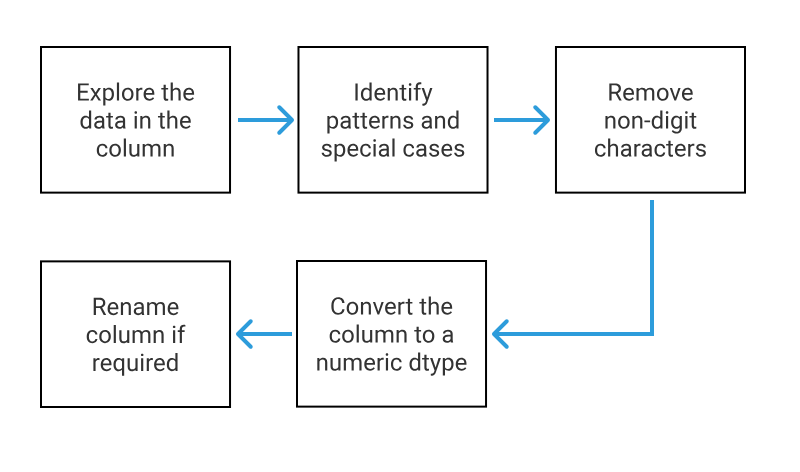

To do this, we use the Series.astype() method. To convert the column to a numeric dtype, we can pass either int or float as the argument for the method. Since the int dtype can't handle decimal values, we'll convert the screen_size column to the float dtype:

In [33]:
laptops["screen_size"] = laptops["screen_size"].astype(float)
print(laptops["screen_size"].unique())
print("`screen_size` dtype:", laptops["screen_size"].dtype)

[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
`screen_size` dtype: float64


Our screen_size column is now the float64 dtype. Let's convert the dtype of the ram column to numeric next.

In [35]:
laptops['ram'] = laptops['ram'].astype(float)
laptops['ram'].unique()

array([ 8., 16.,  4.,  2., 12.,  6., 32., 24., 64.])

In [36]:
laptops.dtypes

manufacturer     object
model_name       object
category         object
screen_size     float64
screen           object
cpu              object
ram             float64
storage          object
gpu              object
os               object
os_version       object
weight           object
price_euros      object
scr              object
dtype: object